# Similarities and Differences of Top vs. dtf (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '3_July'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df = pd.read_parquet("classification.parquet")


# Eliminate players who maximum number of gambles is 1
df = df.groupby('playerkey').filter(lambda x: x['gambles'].nunique() > 1)


# Reset index
df.index = np.arange(1, len(df) + 1)


# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions on session_machine
print("Number of unique sessions on session_machine in dtf:", len(df['session_machine'].unique()))
print('--------------------------------------------------')




Number of gamblers in dataframe: 13551
--------------------------------------------------
Number of unique visits in dtf: 25
--------------------------------------------------
Number of unique sessions in dtf: 9
--------------------------------------------------
Number of unique sessions on session_machine in dtf: 2735
--------------------------------------------------


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df = pf.consecutive_wins(df, 'visit')

KeyboardInterrupt: 

In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df.groupby('visit')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')

Bottom 20
        #2ws   #3ws  #4ws
visit                    
1      786.0  115.0  40.0
2       17.0    4.0   2.0
3        0.0    0.0   0.0
--------------------------------------------------
Top 20
          #2ws    #3ws    #4ws
visit                         
1      29824.0  5678.0  1750.0
2      23068.0  4310.0  1376.0
3      11144.0  1997.0   559.0
4       4624.0   832.0   231.0
5       2020.0   357.0   132.0
6        909.0   163.0    46.0
7        464.0    92.0    29.0
8        285.0    58.0    33.0
9        227.0    46.0    12.0
10       140.0    28.0    13.0
11       112.0    23.0     3.0
12        79.0    19.0     3.0
13        59.0     8.0     0.0
14        74.0     7.0     1.0
15        53.0     9.0     3.0
16         8.0     3.0     1.0
17        36.0     3.0     0.0
18        34.0     7.0     0.0
19        40.0    10.0     2.0
20         2.0     0.0     0.0
21         3.0     1.0     0.0
22        48.0     6.0     3.0
23         0.0     0.0     0.0
24         9.0     1.0     

In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df_s = pf.consecutive_wins(df, 'session_time')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Bottom 20')
print(df_s.groupby('session_time')[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Bottom 20
               #2ws   #3ws  #4ws
session_time                    
1             777.0  115.0  41.0
2              22.0    4.0   2.0
3               0.0    0.0   0.0
--------------------------------------------------
Top 20
                 #2ws    #3ws    #4ws
session_time                         
1             42545.0  8024.0  2426.0
2             17930.0  3270.0  1052.0
3              7934.0  1496.0   474.0
4              3155.0   589.0   164.0
5              1106.0   169.0    53.0
6               408.0    58.0    21.0
7               160.0    39.0     6.0
8                35.0     8.0     2.0
9                 9.0     0.0     0.0
10               12.0     2.0     0.0


### Gender Differences

Number of unique players in bottom 20%:
gender
F    1359
M    1509
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
gender
F    1349
M    1549
Name: playerkey, dtype: int64
--------------------------------------------------


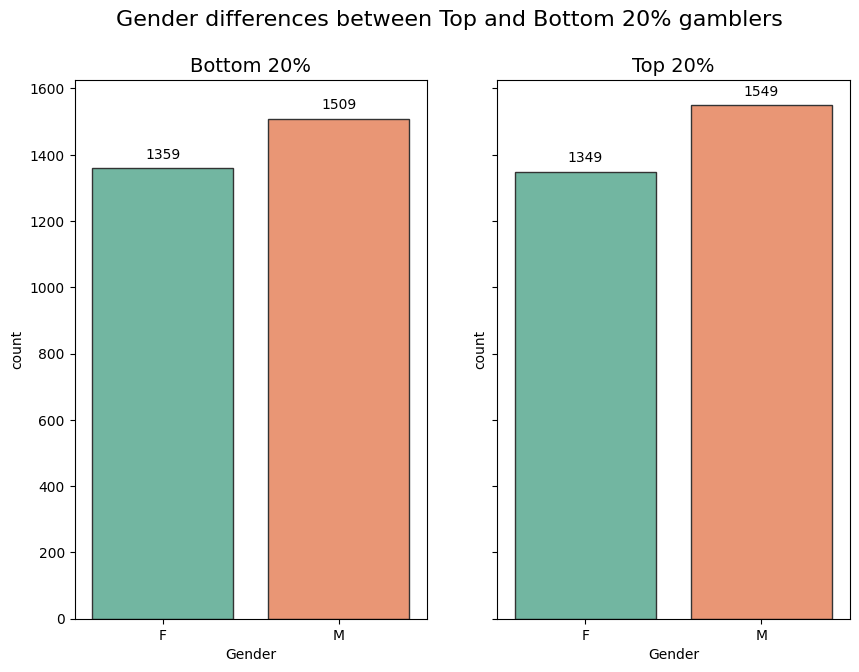

In [11]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('gender')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and dtf gamblers
pf.plot_overall_diff('gender', df_top_20, df, title='Gender', figsize=(10, 7))

### Age Differences

In [12]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

df_top_20['age_range'] = pd.cut(df_top_20['age'], bins=bins, labels=labels, right=False)
df_top_20['age_gen'] = pd.cut(df_top_20['age'], bins=bins, labels=generations, right=False)

Number of unique players in bottom 20%:
age_range
18-24     176
25-40    1162
41-55     867
56-75     625
76+        38
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_range
18-24      19
25-40     567
41-55    1134
56-75    1085
76+        93
Name: playerkey, dtype: int64
--------------------------------------------------


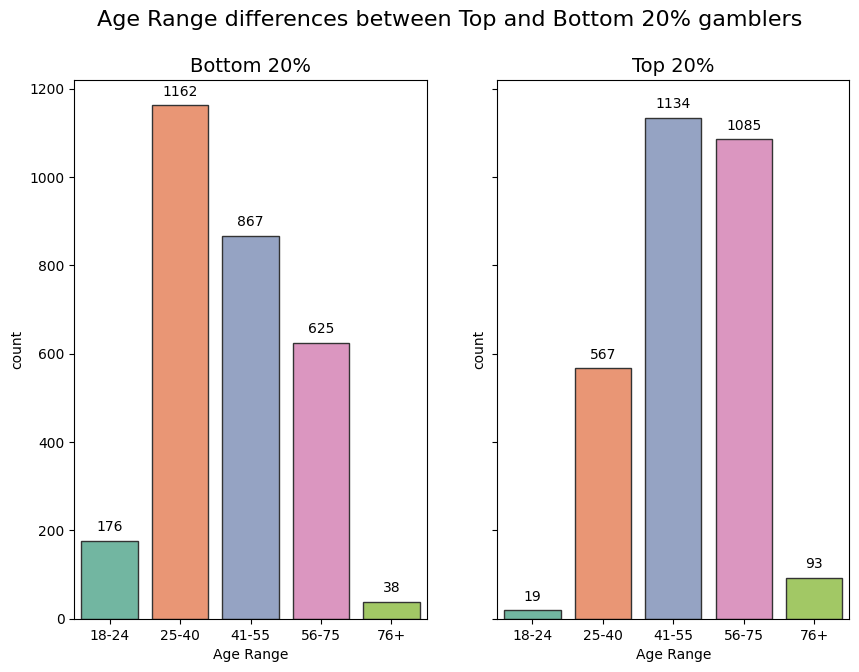

In [13]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and dtf gamblers
pf.plot_overall_diff('age_range', df_top_20, df, title='Age Range', figsize=(10, 7))

Number of unique players in bottom 20%:
age_gen
Gen Z            176
Millenials      1162
Gen X            867
Baby Boomers     625
Silent            38
Name: playerkey, dtype: int64
--------------------------------------------------
Number of unique players in top 20%:
age_gen
Gen Z             19
Millenials       567
Gen X           1134
Baby Boomers    1085
Silent            93
Name: playerkey, dtype: int64
--------------------------------------------------


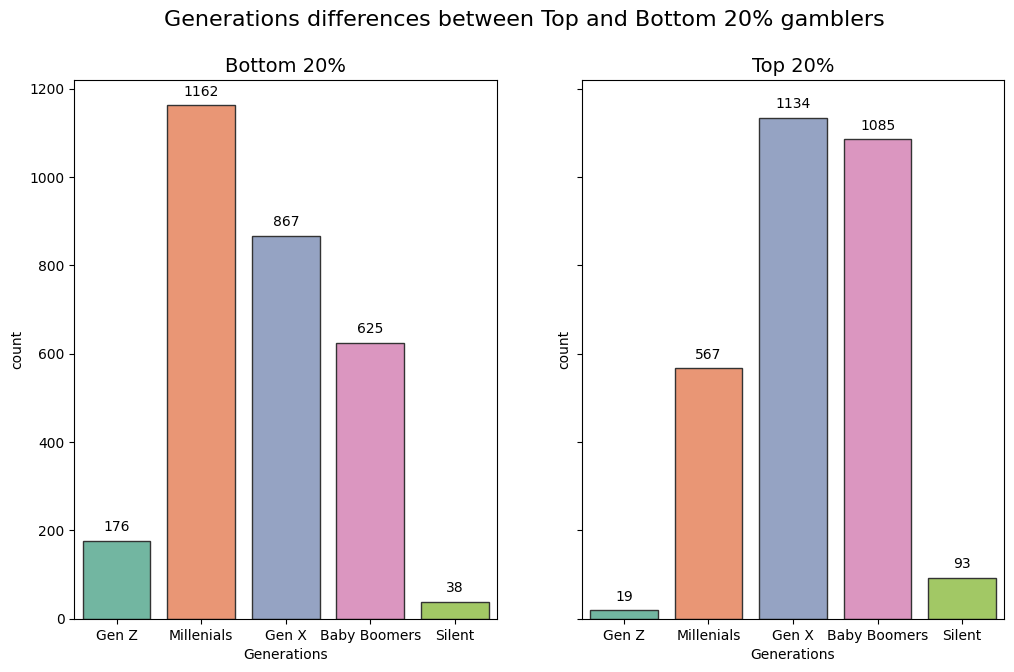

In [14]:
# Age generation differences
print("Number of unique players in dtf:")
print(df.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')
print("Number of unique players in top 20%:")
print(df_top_20.groupby('age_gen')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot the differences between top and dtf gamblers
pf.plot_overall_diff('age_gen', df_top_20, df, title='Generations', figsize=(12, 7))


Male age differences in bottom 20%:
age_range
18-24     77
25-40    637
41-55    472
56-75    307
76+       16
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in bottom 20%:
age_range
18-24     99
25-40    525
41-55    395
56-75    318
76+       22
Name: playerkey, dtype: int64


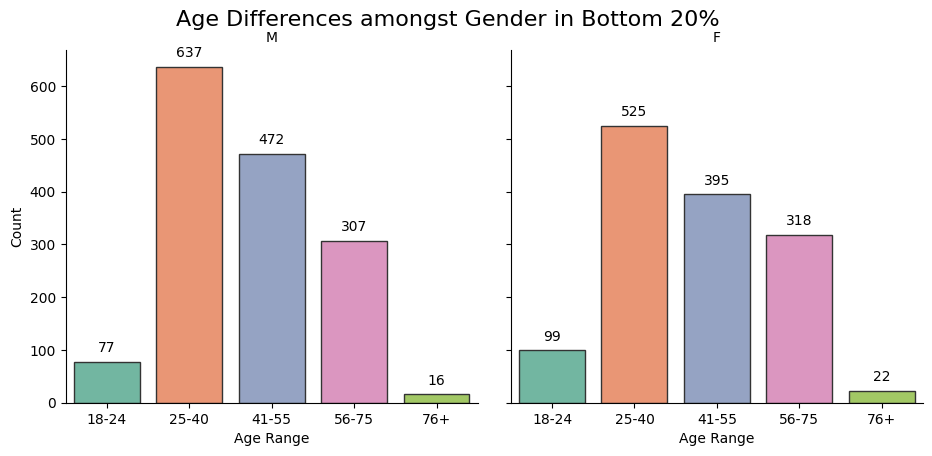

In [15]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


Male age differences in top 20%:
age_range
18-24     12
25-40    351
41-55    612
56-75    523
76+       51
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in top 20%:
age_range
18-24      7
25-40    216
41-55    522
56-75    562
76+       42
Name: playerkey, dtype: int64
--------------------------------------------------


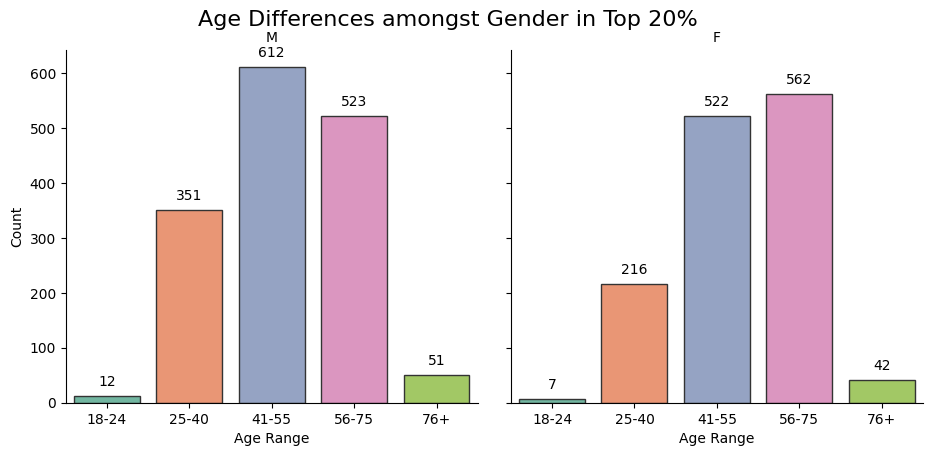

In [16]:
# Age range of male gamblers in top 20%
print("Male age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of female gamblers in top 20%
print("Female age differences in top 20%:")
print(df_top_20[df_top_20['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')

# Plot gender differences
pf.plot_gender_diff(df_top_20, 'Top 20%', figsize=(10, 5))

### Increse and Decrease of SlotDenomination and Bet

In [ ]:
# Lets cound the number of times a player increase slot denominations
players_increase_slot_t20 = cf.count_increase(df_top_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_t20 = cf.count_decrease(df_top_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_t20 = cf.count_increase(df_top_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_t20 = cf.count_decrease(df_top_20, "decrease_maxbet", "playerkey", "maxbet")

In [ ]:
# Lets do the same but for bottom 20%
players_increase_slot_b20 = cf.count_increase(df_bottom_20, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_b20 = cf.count_decrease(df_bottom_20, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_b20 = cf.count_increase(df_bottom_20, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_b20 = cf.count_decrease(df_bottom_20, "decrease_maxbet", "playerkey", "maxbet")

### Wealth Differences
#### General

In [19]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)
df_top_20['depletion_rate'] = df_top_20.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


#### Per Visit

In [21]:
# Create dataframe
df_all_v = pf.merge_dfs_per_player(data_t=df_top_20, data_b=df, grouping='visit', print_results=False)

In [23]:
print(df_all_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'rank', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'std_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']


df_all_v = df_all_v.reindex(columns=desired_order)

Index(['index', 'playerkey', 'visit', 'rank', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'std_time_per_gamble',
       'min_time_per_gamble', 'max_time_per_gamble', 'total_duration',
       'total_gambles', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/m

##### Distribution Ending Balances

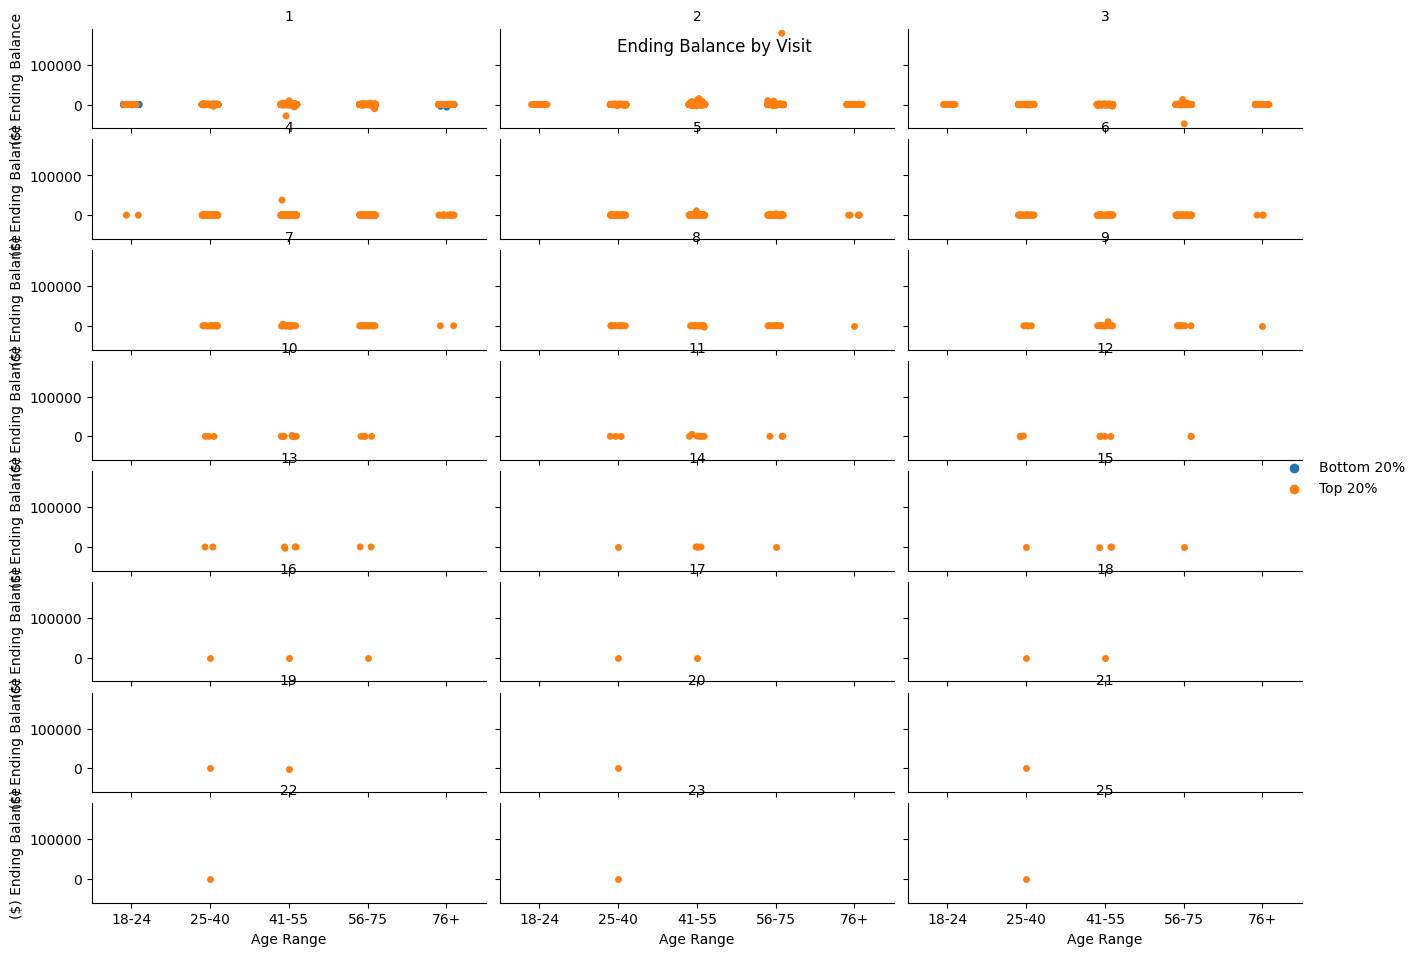

In [24]:
# Save dataframe to paquet file
df_all_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit.parquet')

# print(df_all_v.head(2))

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['dtf', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)

f.fig.set_size_inches(14, 9)


Outlier Players with gains greater than $10,000:
      playerkey  rank  ending_balance percentile
3512       1286   3.0         10765.0    Top 20%
3516       1286   3.0         10287.0    Top 20%
3663       1496   3.0        179575.0    Top 20%
5940       5855   3.0         38048.0    Top 20%
6151       6186   3.0         12632.0    Top 20%
9257      12895   3.0         14966.0    Top 20%
Outlier Players with losses greater than $10,000:
      playerkey  rank  ending_balance percentile
3662       1496   3.0   -10725.000000    Top 20%
3664       1496   3.0   -48763.058594    Top 20%
7503       8968   3.0   -28752.000000    Top 20%


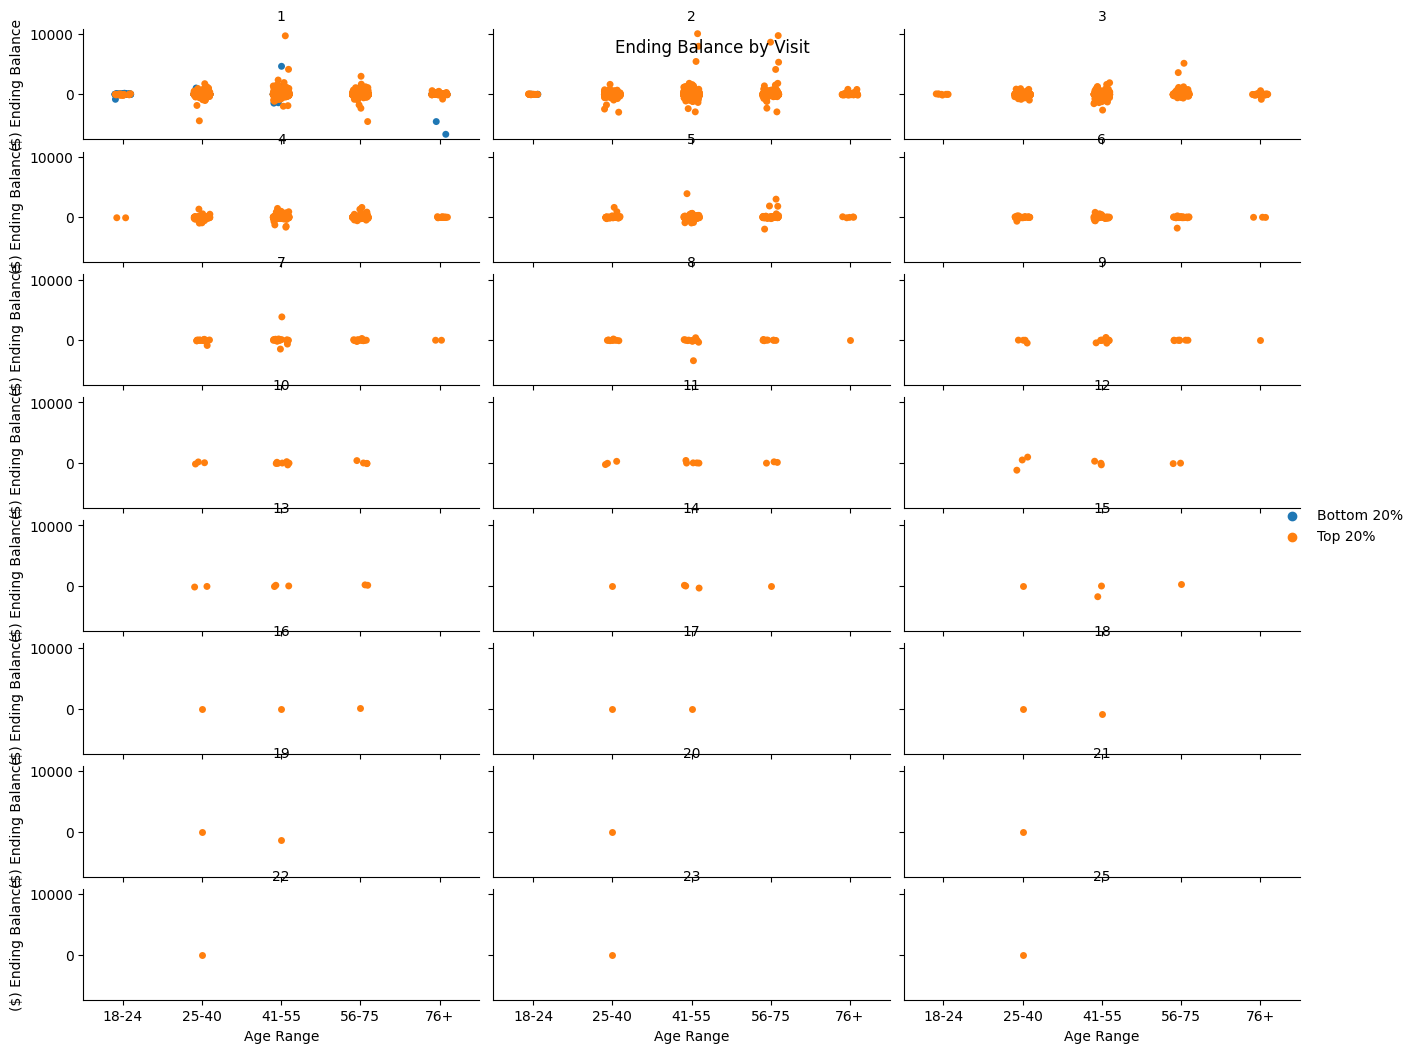

In [25]:
# Outliers - Players who make over the cut_off
df_no_outliers_v = pf.remove_outliers(df_all_v, cut_off=cut_off)

# Save dataframe to paquet file
df_no_outliers_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_visit_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_v, col='visit', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['dtf', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
f.fig.suptitle('Ending Balance by Visit', fontsize=12)
f.fig.set_size_inches(14, 10)


##### Overall Gains/Loses

In [26]:
# With Outliers Present
combined_data = pf.merge_dfs_overall(data_t=df_top_20, data_b=df, grouping='visit', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%    -16290.412109
        Top 20%        10194.774414
M       Bottom 20%      -772.190369
        Top 20%       195518.703125
Name: ending_balance, dtype: float32
-------------------------------------------------------
visit  gender  percentile
1      F       Bottom 20%    -15931.122070
               Top 20%        27795.191406
       M       Bottom 20%       275.895996
               Top 20%       -29572.451172
2      F       Bottom 20%      -354.000427
               Top 20%         2922.350586
       M       Bottom 20%     -1055.586304
               Top 20%       221637.515625
3      F       Bottom 20%        -5.289974
               Top 20%       -10456.017578
       M       Bottom 20%         7.500000
               Top 20%       -57336.117188
4      F       Top 20%         -320.255859
       M       Top 20%        31538.726562
5      F       Top 20%         -774.142334
       M       Top 20%        19235.445312
6      

In [27]:
# No Outliers
combined_data_NO = pf.merge_dfs_overall(data_t=df_top_20, data_b=df, grouping='visit', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_visit_NO.parquet')

Bottom 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
[]
-----------------------------------------------------------------
Top 20%
Outlier Players with gains greater than $10,000:
          playerkey  rank age_range gender  ending_balance
943429         1286   3.0     41-55      M         10765.0
943433         1286   3.0     41-55      M         10287.0
1208576        1496   3.0     56-75      M        179575.0
5208428        5855   3.0     41-55      M         38048.0
5588577        6186   3.0     56-75      M         12632.0
11623426      12895   3.0     41-55      M         14966.0
Outlier Players with losses greater than $10,000:
         playerkey  rank age_range gender  ending_balance
1208575       1496   3.0     56-75      M   -10725.000000
1208577       1496   

percentile    Bottom 20%       Top 20%
gender                                
F          -16290.412109  10194.774414
M            -772.190369  23791.505859


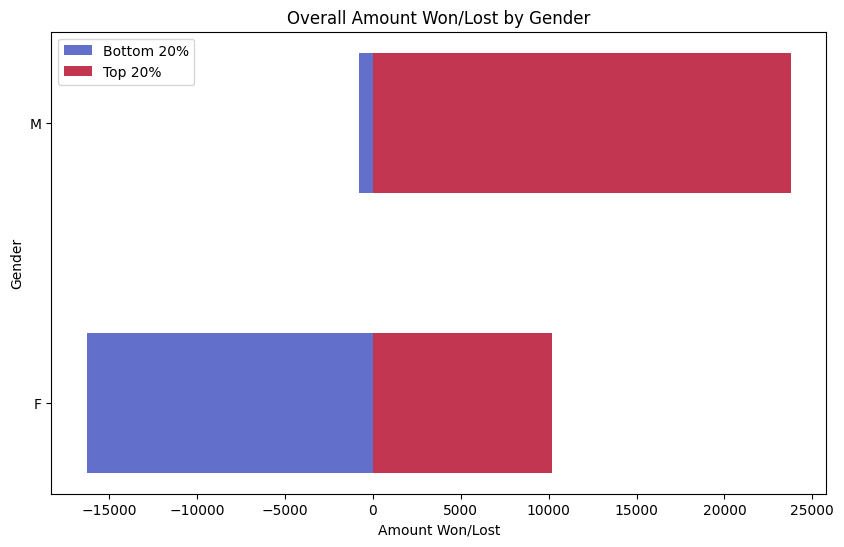

In [28]:
# Plot Gender divergent plot with outliers
# pivot_plot(combined_data, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

# Plot Gender with no outliers
pf.pivot_plot(combined_data_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')


percentile    Bottom 20%       Top 20%
age_range                             
18-24       -1348.973267   -932.337341
25-40       -2624.620361 -23318.011719
41-55        -725.012817  17044.654297
56-75       -1129.382202  39069.449219
76+        -11234.614258   2122.528320


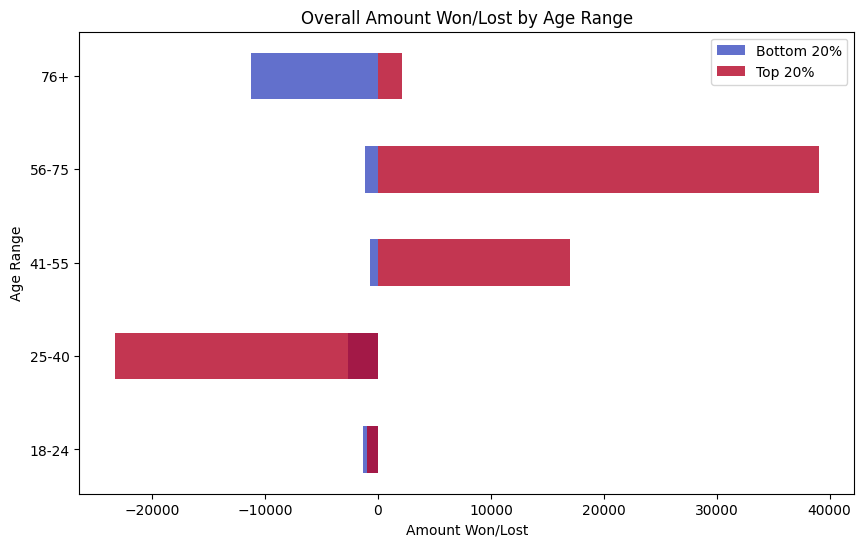

In [29]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')


percentile    Bottom 20%       Top 20%
rank                                  
1.0        -15617.717773 -11474.198242
2.0         -1908.524170  -2686.545410
3.0          2419.030518  52517.218750
6.0         -1955.391113  -4370.196289


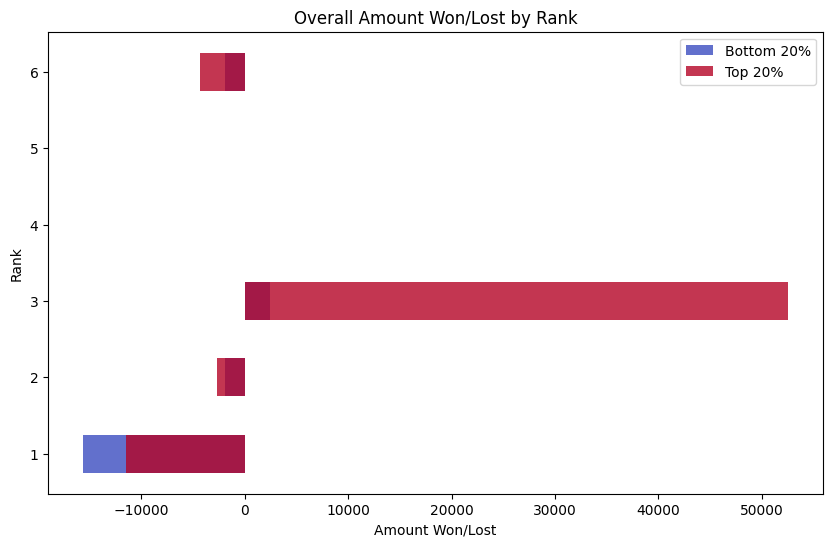

In [30]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')


##### Per Vist Gains/Loses

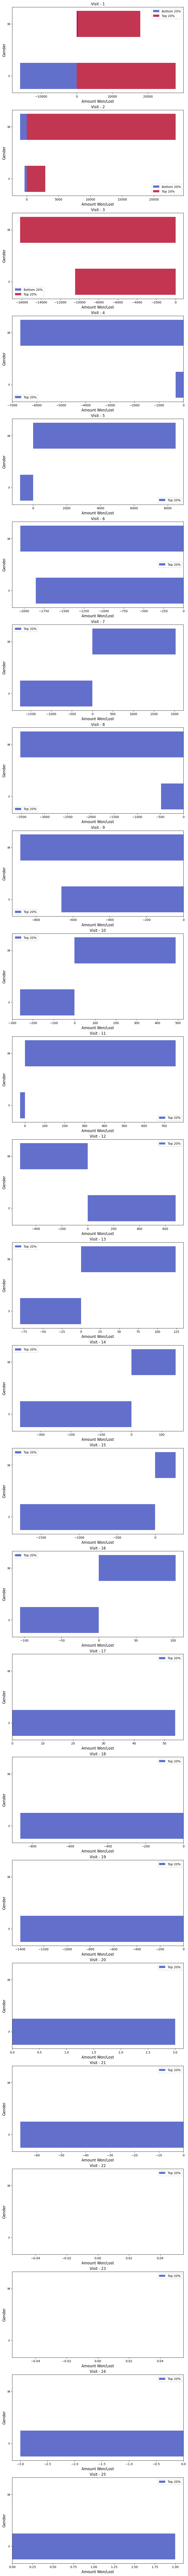

In [31]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'gender']).sum(numeric_only=True))

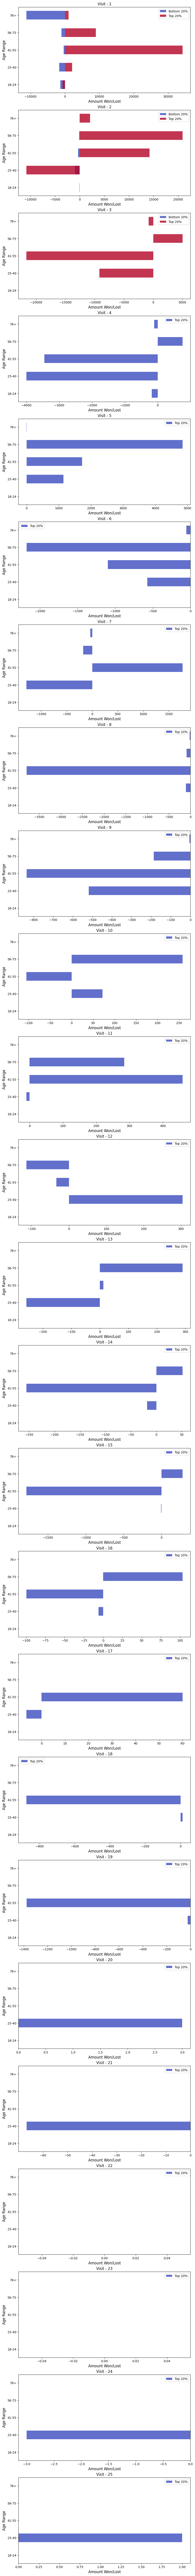

In [32]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'age_range']).sum(numeric_only=True))

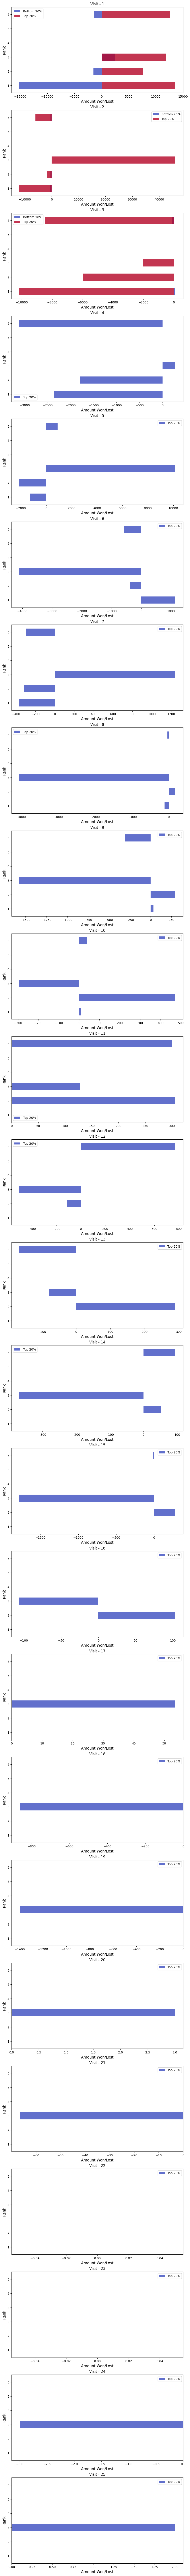

In [33]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_NO, grouping='visit', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Visit', height=6)

# See Numbers for each visit
# print(combined_data_NO.groupby(['visit', 'percentile', 'rank']).sum(numeric_only=True))

#### Per Session

In [34]:
df_all_s = pf.merge_dfs_per_player(data_t=df_top_20_s, data_b=df_s, grouping='session_time', print_results=True)

Total amount won or lost in each session_time bottom 20%:
session_time
1   -16594.306641
2     -631.718689
3     -327.375000
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each gender in bottom 20%:
gender
F   -16299.213867
M    -1254.186890
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each age range in bottom 20%:
age_range
18-24    -1525.990234
25-40    -2775.597656
41-55    -1091.343994
56-75     -925.855713
76+     -11234.613281
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost for each rank in bottom 20%:
rank
1.0   -16380.724609
2.0    -1699.541138
3.0     2193.620361
6.0    -1666.755493
Name: playercashableamt, dtype: float32
-------------------------------------------------------
Total amount won or lost in each session_time top 20%:
session_time
1     

In [36]:
print(df_all_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'rank', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'std_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine', 'sim_play','percentile']

df_all_s = df_all_s.reindex(columns=desired_order)

Index(['index', 'playerkey', 'session_time', 'rank', 'gender', 'age_range',
       'age_gen', 'beginning_amt', 'ending_amt', 'ending_balance',
       'ave_slotdenom', 'std_slotdenom', 'min_slotdenom', 'max_slotdenom',
       'ave_theo_payback', 'min_theo_payback', 'max_theo_payback',
       'ave_wageramt', 'std_wageramt', 'min_wager', 'max_wager', 'ave_p/b',
       'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', '#inc_slotdenom',
       '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       'machines_changes', '#W', '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g',
       'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', '3ws_profit',
       '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', 'ave_time_per_gamble',
       'std_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
       'total_duration', 'total_gambles', 'unique_machines',
       'ave_time_per_machine', 'w/min', 'l/min'

##### Distribution Ending Balances

Text(0.5, 0.98, 'Ending Balance by Visit')

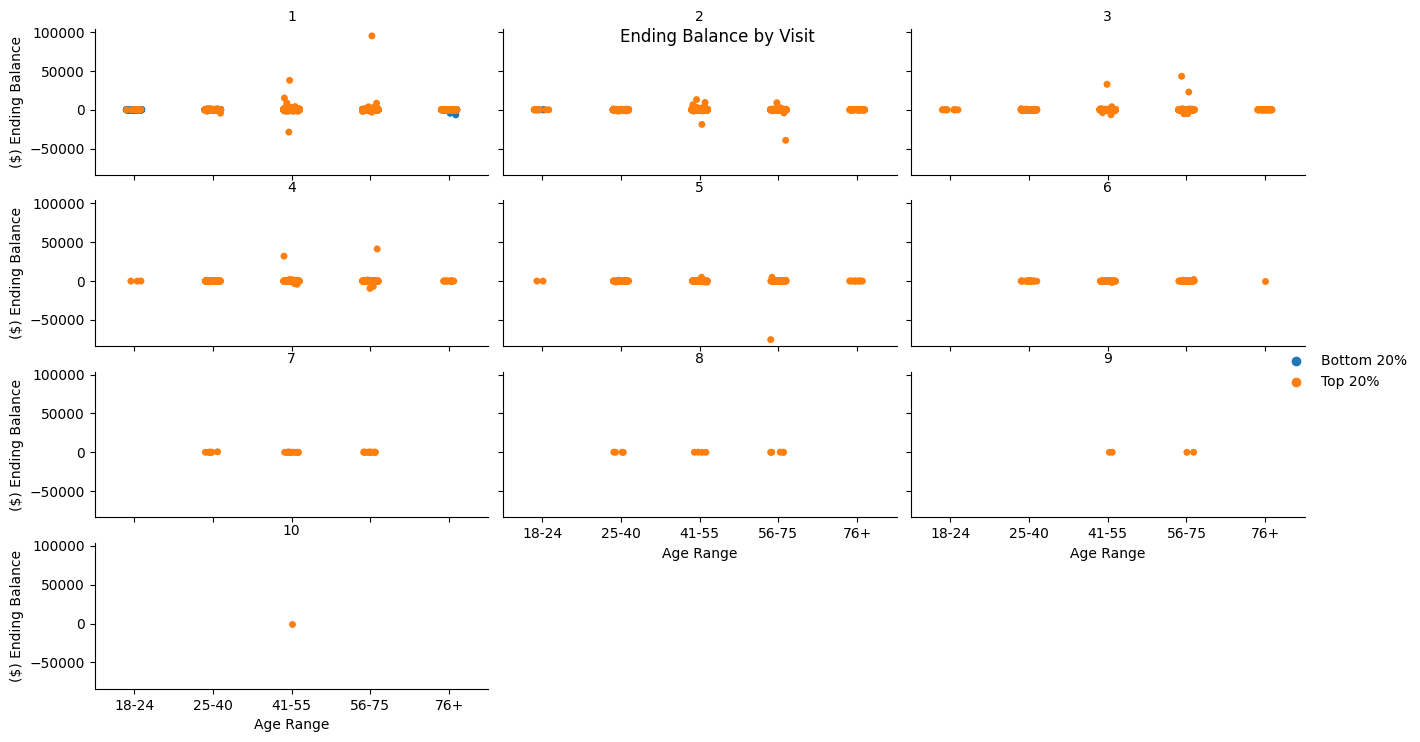

In [37]:
# Save dataframe to paquet file
df_all_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_all_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['dtf', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Visit', fontsize=12)


Outlier Players with gains greater than $10,000:
      playerkey  rank  ending_balance percentile
3482       1496   3.0         95200.0    Top 20%
3484       1496   3.0         43125.0    Top 20%
3485       1496   3.0         41353.0    Top 20%
5519       5855   3.0         37908.0    Top 20%
5520       5855   3.0         13168.0    Top 20%
5521       5855   3.0         32800.0    Top 20%
5522       5855   3.0         32048.0    Top 20%
5728       6186   3.0         22816.0    Top 20%
8797      12895   3.0         15146.0    Top 20%
Outlier Players with losses greater than $10,000:
      playerkey  rank  ending_balance percentile
3483       1496   3.0   -39347.039062    Top 20%
3486       1496   3.0   -75457.062500    Top 20%
7011       8968   3.0   -28752.000000    Top 20%
7644      10106   3.0   -18864.339844    Top 20%


Text(0.5, 0.98, 'Ending Balance by Session')

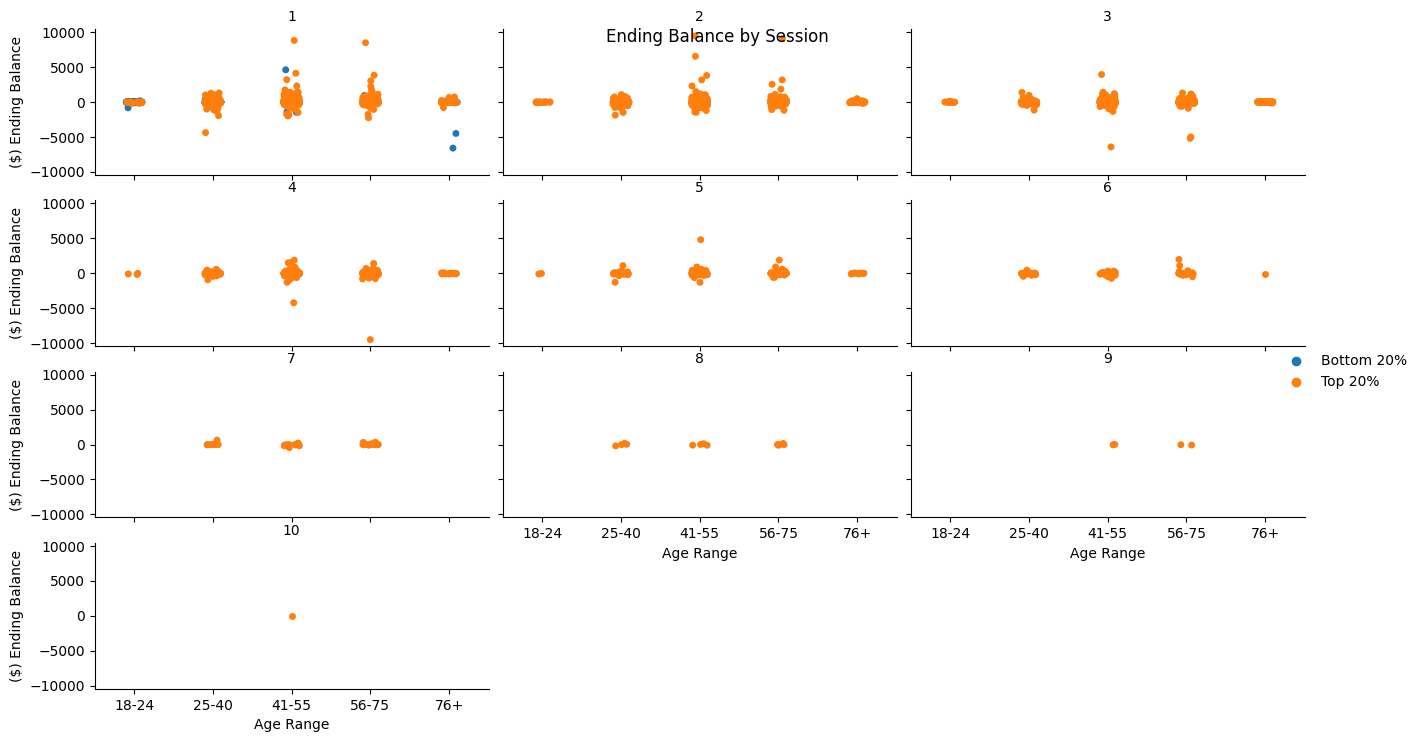

In [38]:
# Outliers - Players who make over the cut_off
df_no_outliers_s = pf.remove_outliers(df_all_s, cut_off=cut_off)
# Save dataframe to paquet file
df_no_outliers_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/per_player_ending_balance_by_session_NO.parquet')

# Create scatterplot of ending balance by visit
f = sns.FacetGrid(df_no_outliers_s, col='session_time', col_wrap=3, height=4, aspect=1.5)
f.map(sns.stripplot, 'age_range', 'ending_balance', 'percentile', hue_order=['dtf', 'Top 20%'], order=['18-24', '25-40', '41-55', '56-75', '76+'], palette="tab10")
f.add_legend()
f.set_titles('{col_name}')
f.set_axis_labels('Age Range', '($) Ending Balance')
# Set y-axis on a log scale
# f.set(yscale='log')
f.fig.set_size_inches(14, 7)
f.fig.suptitle('Ending Balance by Session', fontsize=12)


##### Overall Gains/Loses

In [39]:
# With Outliers Present
combined_data_s = pf.merge_dfs_overall(data_t=df_top_20_s, data_b=df_s, grouping='session_time', cut_off=cut_off, print_results=True, outliers=True)

# Save to parquet file
combined_data_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session.parquet')

With Outliers present:
gender  percentile
F       Bottom 20%    -16299.213867
        Top 20%        12053.065430
M       Bottom 20%     -1254.187134
        Top 20%       136916.453125
Name: ending_balance, dtype: float32
-------------------------------------------------------
session_time  gender  percentile
1             F       Bottom 20%    -16025.497070
                      Top 20%        20841.792969
              M       Bottom 20%      -568.810730
                      Top 20%       129113.257812
2             F       Bottom 20%      -271.342224
                      Top 20%         2283.449463
              M       Bottom 20%      -360.376434
                      Top 20%       -40136.058594
3             F       Bottom 20%        -2.375000
                      Top 20%        -6008.266602
              M       Bottom 20%      -325.000000
                      Top 20%        80233.695312
4             F       Top 20%        -3368.835938
              M       Top 20%        3

In [40]:
# No Outliers
combined_data_s_NO = pf.merge_dfs_overall(data_t=df_top_20_s, data_b=df_s, grouping='session_time', cut_off=cut_off, print_results=True, outliers=False)

# Save to parquet file
combined_data_s_NO.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Overall/overall_ending_balance_by_session_NO.parquet')

Bottom 20%
Outlier Players with gains greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
Outlier Players with losses greater than $10,000:
Empty DataFrame
Columns: [playerkey, age_range, gender, ending_balance]
Index: []
[]
-----------------------------------------------------------------
Top 20%
Outlier Players with gains greater than $10,000:
         playerkey  rank age_range gender  ending_balance
483430        1496   3.0     56-75      M         95200.0
483432        1496   3.0     56-75      M         43125.0
483433        1496   3.0     56-75      M         41353.0
2083370       5855   3.0     41-55      M         37908.0
2083371       5855   3.0     41-55      M         13168.0
2083372       5855   3.0     41-55      M         32800.0
2083373       5855   3.0     41-55      M         32048.0
2235432       6186   3.0     56-75      M         22816.0
4649370      12895   3.0     41-55      M         15146.0
Outlier Players with

percentile    Bottom 20%       Top 20%
gender                                
F          -16299.213867  12053.065430
M           -1254.187134 -15774.304688


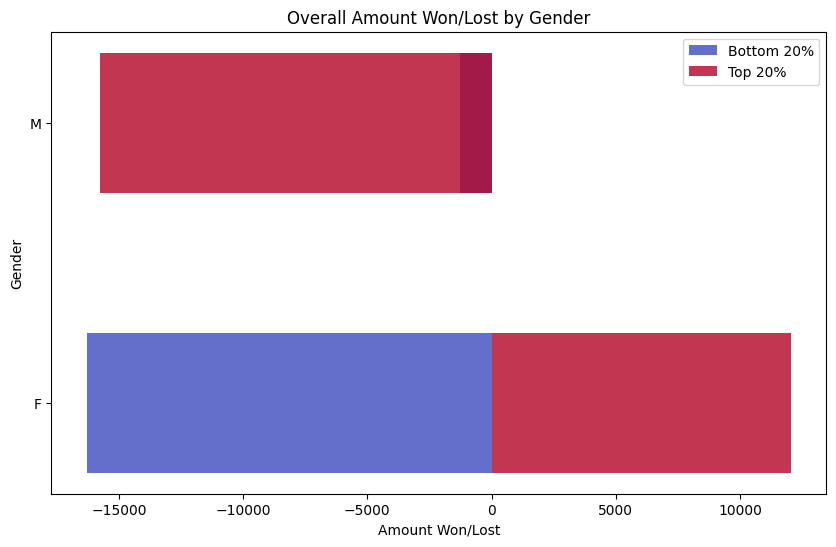

In [41]:
# Plot Gender with no outliers
pf.pivot_plot(combined_data_s_NO, 'gender', 'ending_balance', y_label= 'Gender', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Gender')

percentile    Bottom 20%       Top 20%
age_range                             
18-24       -1525.990234  -1556.344727
25-40       -2775.597412 -32384.724609
41-55       -1091.343872  20730.503906
56-75        -925.855713  10188.597656
76+        -11234.614258   -699.273926


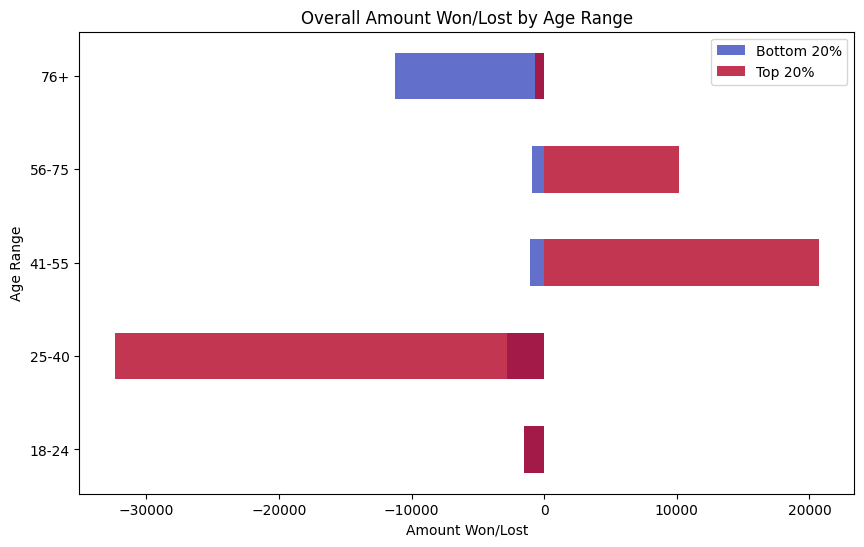

In [42]:
# Plot age_range with no outliers
pf.pivot_plot(combined_data_s_NO, 'age_range', 'ending_balance', y_label= 'Age Range', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Age Range')

percentile    Bottom 20%       Top 20%
rank                                  
1.0        -16380.725586 -17945.138672
2.0         -1699.541016 -12219.341797
3.0          2193.620361  33160.398438
6.0         -1666.755371  -6717.155762


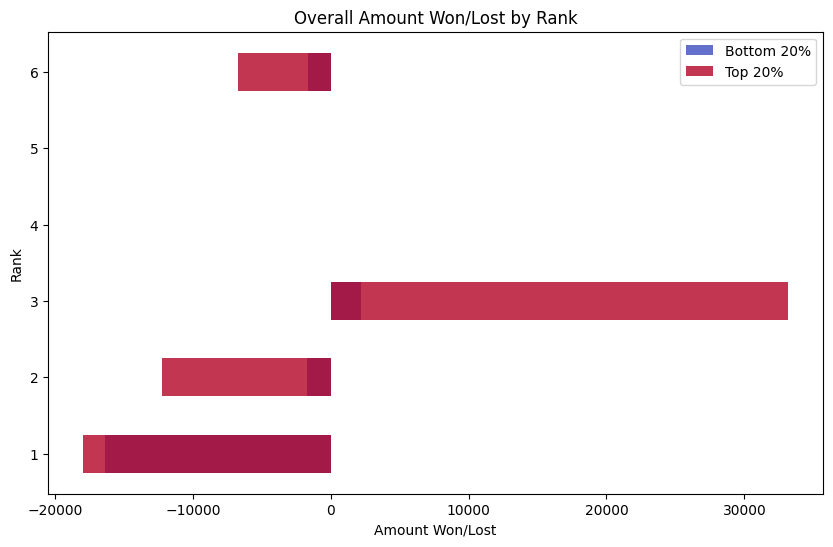

In [43]:
# Plot rank with no outliers
pf.pivot_plot(combined_data_s_NO, 'rank', 'ending_balance', y_label= 'Rank', x_label='Amount Won/Lost', title= 'Overall Amount Won/Lost by Rank')

##### Per Sessions Gains/Loses

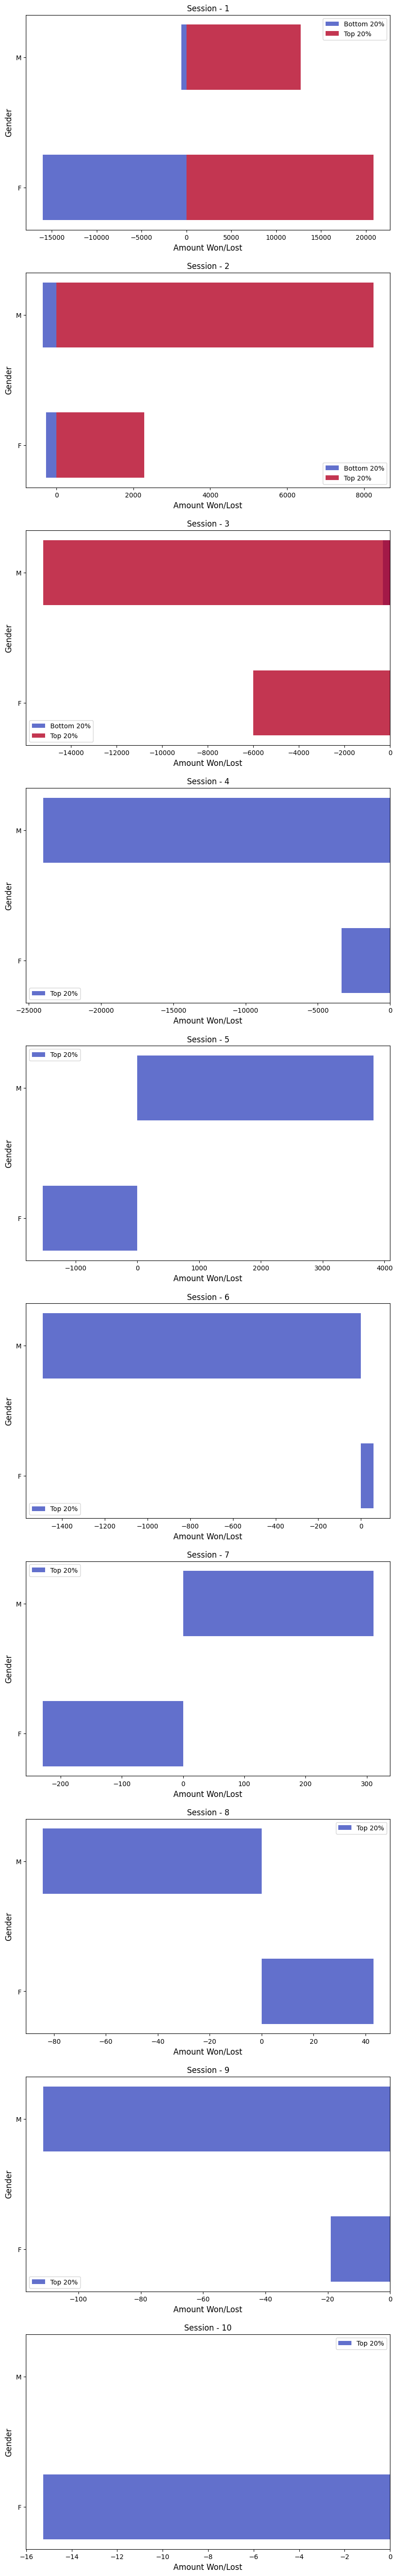

In [44]:
# Plot divergent table by visit on 'gender'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='gender', x='ending_balance', y_label= 'Gender', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'gender']).sum(numeric_only=True))

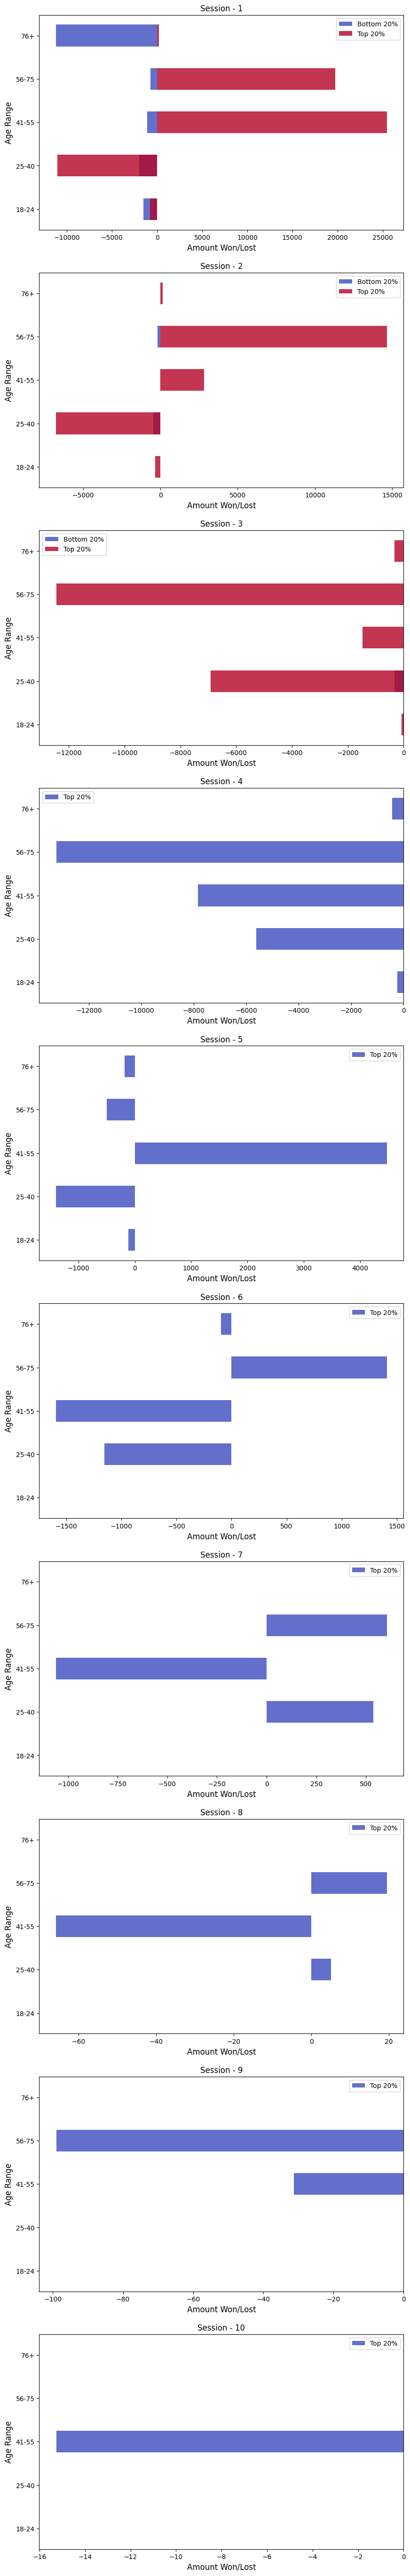

In [45]:
# Plot divergent table by visit on 'age_range'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='age_range', x='ending_balance', y_label= 'Age Range', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'age_range']).sum(numeric_only=True))


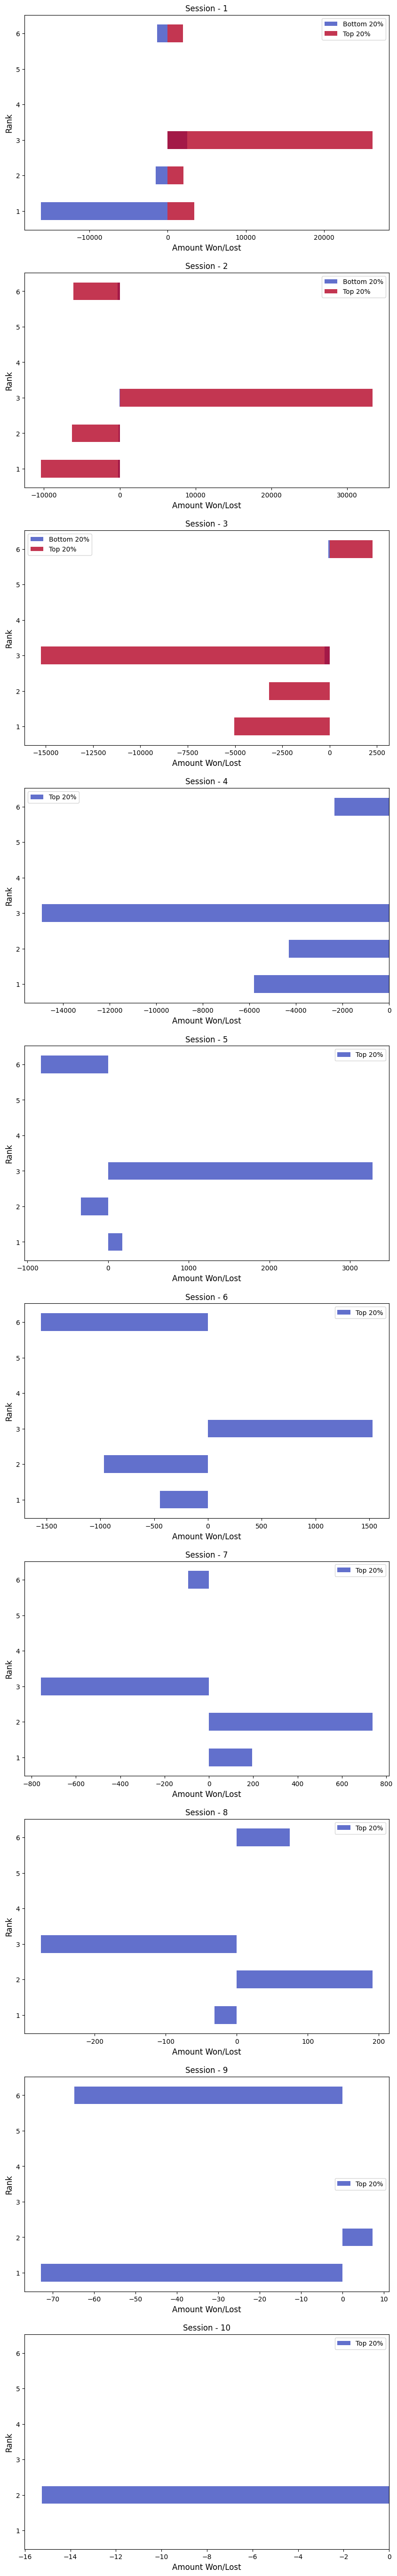

In [46]:
# Plot divergent table by visit on 'rank'
pf.pivot_plot_grouping(combined_data_s_NO, grouping='session_time', y='rank', x='ending_balance', y_label= 'Rank', x_label= 'Amount Won/Lost', title='Session', height=7)

# See Numbers for each visit
# print(combined_data_s_NO.groupby(['session_time', 'percentile', 'rank']).sum(numeric_only=True))
